#### Task 7.1 Combine year 2019 and year 2020’s crime records into one pandas dataframe. Drop duplicates as well as any record that has missing values in the following columns: “INCIDENT_NUMBER”, “OFFENSE_CODE”, “DISTRICT”, “Long”, “Lat”, “SHOOTING”, “OCCURRED_ON_DATE”. Save the “cleaned” pandas dataframe to a separate csv file. Use the "OFFENSE_DESCRIPTION" column to identify violent vs. property crime incidents, and based on the cleaned dataframe, count the total number of violent vs. property crime incidents in Boston in year 2019 and year 2020 respectively. Print the results. Do you see any trend? #### 

In [50]:
### set up work dir and read files
import os

os.chdir('/Users/[editted]/Documents/compsoc/code/boston_crime2019')

import pandas as pd

df_2019=pd.read_csv('boscrime2019.csv',low_memory=False)
df_2020=pd.read_csv('boscrime2020.csv',low_memory=False)
df= pd.concat([df_2019, df_2020], ignore_index=True, sort =False)
print(df.shape)

### clean the data 
df[df['Long'] == 0] #identfy some real missing yet to be marked as NA

import numpy as np
df.loc[df['Long']==0, 'Long'] = np.nan #recode long==0 to NA
print(df)


df_drop = df.dropna(subset=['INCIDENT_NUMBER', 'OFFENSE_CODE', 'DISTRICT', 'Long', 'Lat', 'SHOOTING', 'OCCURRED_ON_DATE'])
print(df_drop.shape) #drop NA

df_clean=df_drop.drop_duplicates()
print(df_clean.shape) #see no duplicates


df_clean.to_csv('df_clean.csv') #save new clean file 


### classify crimes 

cleaned_crime_df=pd.read_csv('df_clean.csv',low_memory=False)
print(cleaned_crime_df.shape)

cleaned_crime_df['offense_type'] = None

cleaned_crime_df['offense_type'][cleaned_crime_df['OFFENSE_DESCRIPTION'].str.lower().str.contains('robbery|assault|rape')] = 'violent crime'
cleaned_crime_df['offense_type'][cleaned_crime_df['OFFENSE_DESCRIPTION'].str.lower().str.contains('burglary|larceny|theft|arson')] = 'property crime'
print(cleaned_crime_df)

describe_by_offense = cleaned_crime_df.groupby(['offense_type', 'YEAR']).agg({'INCIDENT_NUMBER': 'count'}).reset_index()

### des table: total# of crime incidents by year and crime type
describe_by_offense

(158078, 17)
       INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP  \
0            102091671          2647                 NaN   
1            102095489          3115                 NaN   
2            102096818          2905                 NaN   
3            129092894          3201                 NaN   
4            129099920          3301                 NaN   
...                ...           ...                 ...   
158073       020063425          3114                 NaN   
158074       020062356          1107                 NaN   
158075       020046400          1501                 NaN   
158076       020038446          1501                 NaN   
158077       020030892           540                 NaN   

                                      OFFENSE_DESCRIPTION DISTRICT  \
0                               THREATS TO DO BODILY HARM       B3   
1                                      INVESTIGATE PERSON      E18   
2                             VAL - VIOLATION OF AUTO LA

<ipython-input-50-f6cf13943862>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_crime_df['offense_type'][cleaned_crime_df['OFFENSE_DESCRIPTION'].str.lower().str.contains('robbery|assault|rape')] = 'violent crime'
<ipython-input-50-f6cf13943862>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_crime_df['offense_type'][cleaned_crime_df['OFFENSE_DESCRIPTION'].str.lower().str.contains('burglary|larceny|theft|arson')] = 'property crime'


,offense_type,YEAR,INCIDENT_NUMBER
0,property crime,2019,12897
1,property crime,2020,11935
2,violent crime,2019,8002
3,violent crime,2020,5033


In [8]:
print(describe_by_offense)

     offense_type  YEAR  INCIDENT_NUMBER
0  property crime  2019            12897
1  property crime  2020            11935
2   violent crime  2019             8002
3   violent crime  2020             5033


- Both property and violent crime incidents decrease from 2019 to 2020. 
- Property crime incidents occured more frequently than violent crime incidents in botn years. 

#### Task 7.2 Create a scatterplot of annual violent crimes vs. annual property crimes by district in Boston from 2019 to 2020. X axis: annual property crimes. Y axis: annual violent crimes. Use different colors to color data from different years. #### 


<AxesSubplot:xlabel='annual property crime', ylabel='annual violent crime'>

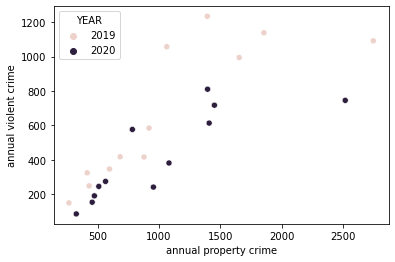

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

describe_by_district = cleaned_crime_df.groupby(['offense_type', 'YEAR', 'DISTRICT']).agg({'INCIDENT_NUMBER': 'count'}).reset_index()
describe_by_district

violent_by_district = describe_by_district[describe_by_district['offense_type'] == 'violent crime']
violent_by_district 

property_by_district = describe_by_district[describe_by_district['offense_type'] == 'property crime']
property_by_district

df=violent_by_district.merge(property_by_district,on=('DISTRICT','YEAR'))

df=df.rename(columns={'INCIDENT_NUMBER_x':'annual violent crime','INCIDENT_NUMBER_y':'annual property crime'})
df


# sns.scatterplot(x='annual property crime', y='annual violent crime', data=df, hue='YEAR')
# I dropped data if disrtict==external
sns.scatterplot(x='annual property crime', y='annual violent crime', data=df[df.DISTRICT != 'External'], hue='YEAR')


#### Task 7.3 Create a bar plot of the sum of annual violent and property crimes by district in Boston from 2019 to 2020. X axis: districts. Y axis: annual sums. Use different bars to represent data from different years. ####

<AxesSubplot:xlabel='DISTRICT', ylabel='annual sums'>

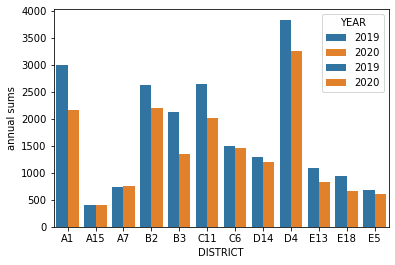

In [45]:
#create new var annual sums
df['annual sums'] = df['annual violent crime'] + df['annual property crime'] 
df

sns.barplot(x='DISTRICT', y='annual sums', data=df, hue='YEAR')

#if drop district==external
sns.barplot(x='DISTRICT', y='annual sums', data=df[df.DISTRICT != 'External'], hue='YEAR') 

#### Task 7.4 Create a violin plot of district-level shooting incidents by quarter in Boston from 2019 to 2020. X axis: quarters. Y axis: district-level shooting incidents (counts). ####

In [63]:
# create quarters
cleaned_crime_df.loc[cleaned_crime_df['MONTH'].isin([1, 2, 3]), 'quarter'] = 'q1'
cleaned_crime_df.loc[cleaned_crime_df['MONTH'].isin([4, 5, 6]), 'quarter'] = 'q2'
cleaned_crime_df.loc[cleaned_crime_df['MONTH'].isin([7, 8, 9]), 'quarter'] = 'q3'
cleaned_crime_df.loc[cleaned_crime_df['MONTH'].isin([10, 11, 12]), 'quarter'] = 'q4'

describe_by_shooting = cleaned_crime_df.groupby(['DISTRICT','YEAR', 'quarter']).agg({'SHOOTING': 'sum'}).reset_index()

describe_by_shooting

,DISTRICT,YEAR,quarter,SHOOTING
0,A1,2019,q1,0
1,A1,2019,q2,3
2,A1,2019,q3,1
3,A1,2019,q4,2
4,A1,2020,q1,2
...,...,...,...,...
97,External,2019,q4,0
98,External,2020,q1,0
99,External,2020,q2,0
100,External,2020,q3,1


<AxesSubplot:xlabel='SHOOTING', ylabel='quarter'>

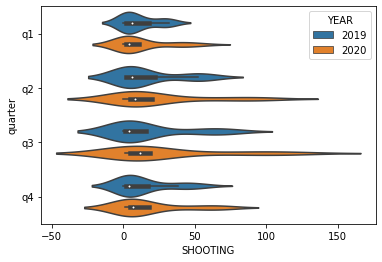

In [61]:
sns.violinplot(y='quarter', x='SHOOTING', data=describe_by_shooting, hue='YEAR' )

# or drop district==external
# sns.violinplot(y='quarter', x='SHOOTING', data=describe_by_shooting[describe_by_shooting.DISTRICT!='External'], hue='YEAR' )